In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.linear_model import LinearRegression

In [2]:
class portfolio:
    def __init__(self,tickers,weights,start_date, end_date):
        self._tickers = tickers
        self._weights = weights
        self._start_date = start_date
        self._end_date = end_date
        self._data = self._load_portfolio_data()
        
        if sum(self._weights)!=1:
            raise ValueError("Weight must sum up to 1")
        
    def _load_portfolio_data(self):
        data = yf.download(tickers,start = start_date,end = end_date)['Adj Close']
        returns= data.pct_change().dropna()
        weighted_returns = returns*self._weights
        portfolio_returns = weighted_returns.sum(axis=1)
        df = pd.DataFrame({'Date':portfolio_returns.index, 'Returns':portfolio_returns.values})
        return df
    
    @staticmethod
    def _calculate_var(returns,confidence_level):
        return np.percentile(returns,100-confidence_level)
        
    @staticmethod
    def _calculate_cvar(returns, confidence_level):
        var = portfolio._calculate_var(returns,confidence_level)
        returns_below_var = returns[returns<=var]
        return np.mean(returns_below_var)
    
    def _calculate_expected_returns(self):
        x = [date.toordinal() for date in self._data['Date'].dt.to_pydatetime()]
        x = np.array(x).reshape(-1, 1)
        y = self._data['Returns'].values
        model = LinearRegression()
        model.fit(x, y)
        future_dates = pd.date_range(start=self._data['Date'].iloc[-1], periods=5, freq='D')
        future_dates_numeric = np.array([date.toordinal() for date in future_dates.to_pydatetime()]).reshape(-1, 1)
        future_returns = model.predict(future_dates_numeric)
        return future_dates, future_returns

        
    def plot_portfolio_return(self):
        plt.plot(self._data.index,self._data['Returns'])
        plt.xlabel('Date')
        plt.ylabel('Returns')
        plt.title('Portfolio Returns')
        plt.show()
        
    @property
    def data(self):
        return self._data
    
    @property
    def weights(self):
        return self._weights
    
    @property
    def tickers(self):
        return self._ticker
    
    @property
    def start_date(self):
        return self._start_date
    
    @property
    def end_date(self):
        return self._end_date
    
    @staticmethod
    def _validate_data(data):
        if data.empty:
            raise ValueError("Portfolio data is empty")
            
    def calculate_var(self,confidence_level = 95):
        returns = self._data['Returns']
        self._validate_data(returns)
        return portfolio._calculate_var(returns,confidence_level)
    
    def calculate_cvar(self,confidence_level = 95):
        returns = self._data['Returns']
        self._validate_data(returns)
        return portfolio._calculate_cvar(returns,confidence_level)
    
    def calculate_expected_returns(self):
        return self._calculate_expected_returns()

In [3]:
tickers = ['KO','TSLA','NIO', 'AAPL']
weights = [0.2,0.2,0.4,0.2]
start_date = '2020-01-01'
end_date = '2023-01-01'
x = portfolio(tickers, weights, start_date, end_date)

[*********************100%***********************]  4 of 4 completed


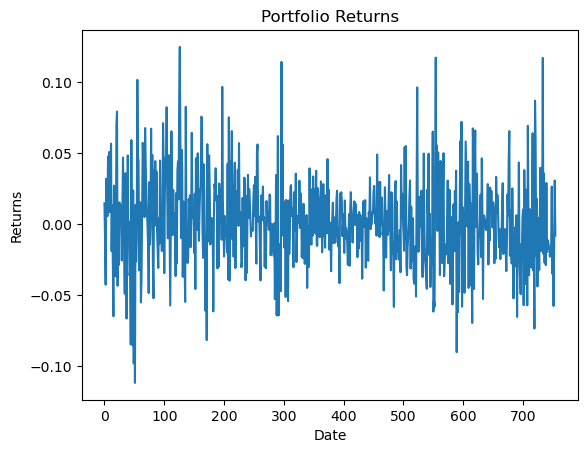

In [4]:
try:
    var =x.calculate_var()
    cvar=x.calculate_cvar()
    x.plot_portfolio_return()
    expected = x.calculate_expected_returns()
except ValueError as e:
    print(f"Error: {str(e)}")

In [5]:
var

-0.048304398817016474

In [6]:
cvar

-0.0631389837857825

In [7]:
expected

(DatetimeIndex(['2022-12-30', '2022-12-31', '2023-01-01', '2023-01-02',
                '2023-01-03'],
               dtype='datetime64[ns]', freq='D'),
 array([-0.0039196 , -0.00393049, -0.00394138, -0.00395227, -0.00396316]))